In [23]:
import numpy as np
import scipy as sp
import os
import glob
import matplotlib.pyplot as plt
import imageio
import random

from matplotlib import colors as mcolors
from sklearn import manifold
from sklearn import decomposition

In [30]:
colors = random.choices(list(mcolors.XKCD_COLORS), k=16)
print(colors)

['xkcd:twilight blue', 'xkcd:blue violet', 'xkcd:violet pink', 'xkcd:bright teal', 'xkcd:light rose', 'xkcd:denim', 'xkcd:tan brown', 'xkcd:grey teal', 'xkcd:pinkish', 'xkcd:yellowy brown', 'xkcd:marine', 'xkcd:taupe', 'xkcd:reddish grey', 'xkcd:dark turquoise', 'xkcd:ruby', 'xkcd:eggplant purple']


In [31]:
data_path = "../data/output/output_2020-06-23T16-29-34.npy"

x = np.load(data_path, allow_pickle=True)

artefacts = np.array([a[5] for a in x])
agent_ids = np.array([a[1] for a in x])

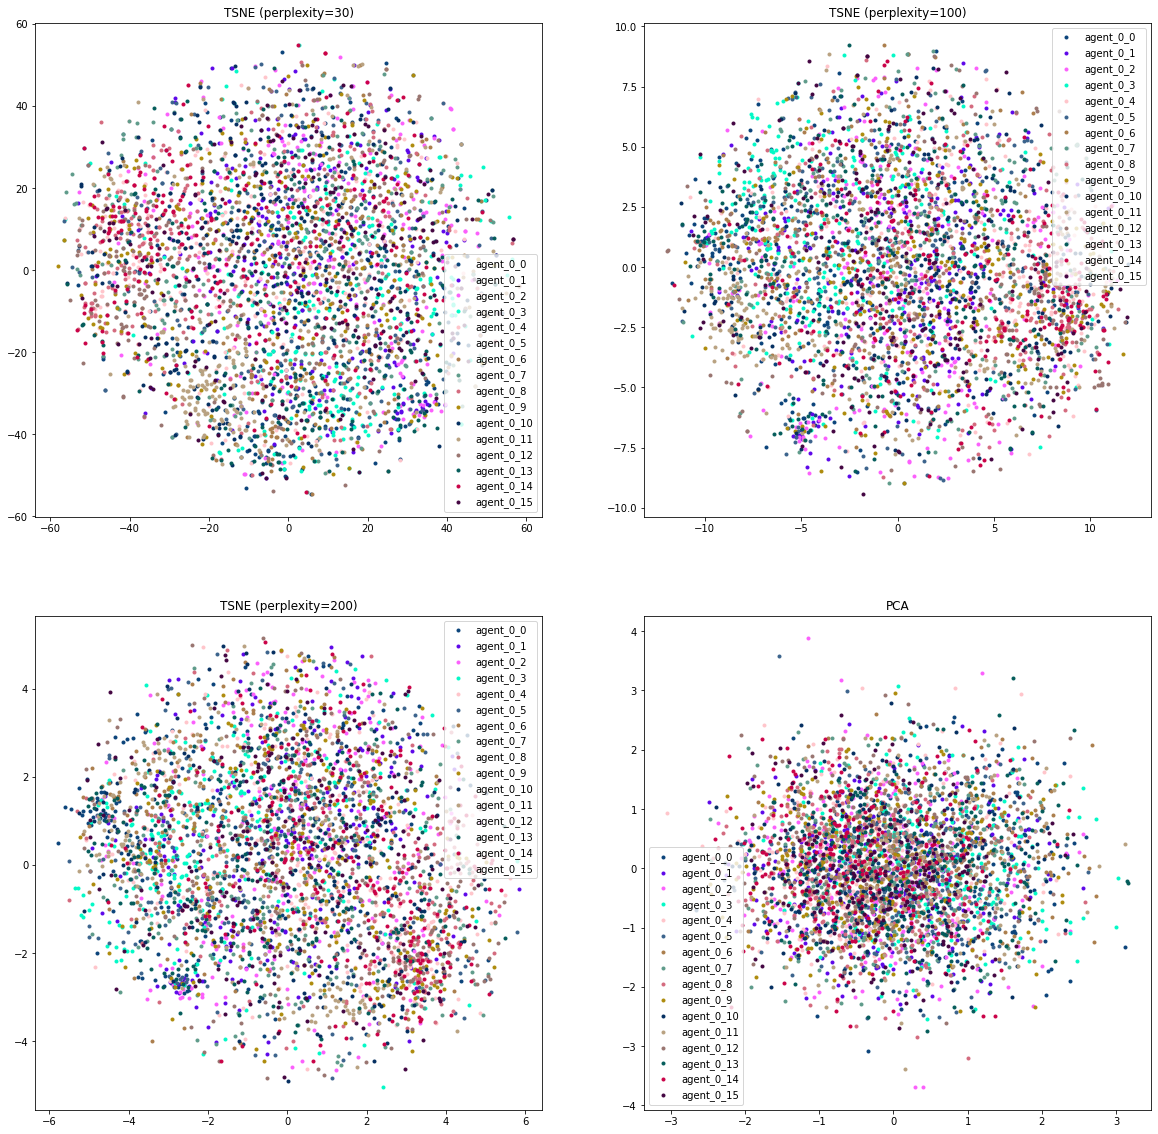

Number of artefacts: 4000


In [37]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

n_agents = 16
labels = [f"agent_0_{i}" for i in range(0, n_agents)]
# colors = plt.cm.tab20.colors

perplexities = [30, 100, 200]
_artefacts = artefacts / 10000000

for i, ax in enumerate(axs.flatten()):
    if i < 3:
        tsne = manifold.TSNE(n_components=2, random_state=1, perplexity=perplexities[i])
        embedded = tsne.fit_transform(_artefacts)
        ax.set_title(f"TSNE (perplexity={perplexities[i]})")
    else:
        pca = decomposition.PCA(n_components=2)
        embedded = pca.fit_transform(artefacts)
        ax.set_title("PCA")

    for i, label in enumerate(labels):
        x, y = embedded[i::n_agents, 0], embedded[i::n_agents, 1]
        ax.scatter(x, y, c=colors[i % n_agents], label=label, marker=".")
    
    ax.legend()

plt.show()
print(f"Number of artefacts: {len(artefacts)}")